###  Name: Shriya Bhat
### Reg: 220968020
### Class: DSE A1
### Week 5 Dataset 1

# WEEK 5 – MULTI-ARMED BANDITS – AD OPTIMIZATION

Consider the dataset **"Ads_Clicks,"** which contains information about user interactions with advertisements over time. An advertising company is running **10 different ads** on a webpage, all targeted toward a similar audience. The dataset records whether a user clicked at a given time step. Each column corresponds to a specific ad, where **YES(1)** indicates that the **ad was clicked**, and **NO(0)** indicates that **it was not**. Consider the attached csv file.

- 1)Define the multi-armed bandit (MAB) problem in the context of ad optimization, considering how an agent selects among multiple ads to maximize clicks.
- 2)How does the exploration-exploitation trade-off influence decision-making in this scenario?
- 3)Implement the ε-greedy algorithm to optimize ad selection and compute the total rewards after **2000-time steps** for: **ε = 0.05** and **ε = 0.2**.
- 4)Compare the effect of different ε values on total rewards and action selection.
- 5)Implement the UCB method with an exploration factor **c = 2.0** and compute total rewards after **2000-time steps**.
- 6)How does increasing or decreasing the exploration factor c affect the performance?
- 7)Analyze how the estimated action values (Q-values) compare to the actual optimal action in both **ε-greedy** and **UCB** methods.
- 8)Which approach leads to a better approximation of the optimal action?
- 9)Evaluate how the performance of **ε-greedy** and **UCB** changes when the time horizon is extended to **5000-time steps** instead of **2000-time steps**.
- Does a longer time horizon reduce the impact of exploration parameters (**ε or c**) on total rewards?


- Instead of a pure optimization problem, the task is on the one hand to maximize the number of clicks, but on the other to simultaneously try out different configurations in a clever way to acquire new data (clicks & views) that are most informative about the true optimum.

- This is often referred to as the Exploration-Exploitation Dilemma: we need to explore and play different teasers to see which one of them works best. But at the same time, we need to exploit our current knowlege and play the configuration we assume to be best as often as possible.

In [20]:
import pandas as pd 
import numpy as np 
import random
df = pd.read_csv("Ad Click Data.csv")
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0.0,Tunisia,3/27/2016 0:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1.0,Nauru,4/4/2016 1:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0.0,San Marino,3/13/2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1.0,Italy,1/10/2016 2:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0.0,Iceland,6/3/2016 3:36,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1.0,Lebanon,2/11/2016 21:49,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1.0,Bosnia and Herzegovina,4/22/2016 2:07,1
997,NaN,51,42415.72,120.37,Expanded intangible solution,South Jessica,1.0,Mongolia,2/1/2016 17:24,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0.0,Guatemala,3/24/2016 2:35,0


In [21]:
df.isnull().sum()

Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Ad Topic Line                0
City                         1
Male                         3
Country                      9
Timestamp                    0
Clicked on Ad                0
dtype: int64

In [22]:
df['Daily Time Spent on Site'] = df['Daily Time Spent on Site'].fillna(df['Daily Time Spent on Site'].mean())
df['Area Income'] = df['Area Income'].fillna(df['Area Income'].mean())
df['Daily Internet Usage'] = df['Daily Internet Usage'].fillna(df['Daily Internet Usage'].mean())
df['Male'] = df['Male'].fillna(df['Male'].mode()[0])
df.isnull().sum()


Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        1
Male                        0
Country                     9
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [23]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [8]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,64.929524,36.009000,54980.667234,179.863620,0.479000,0.50000
std,15.741268,8.785562,13352.264717,43.627946,0.499809,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.545000,29.000000,47117.162500,139.017500,0.000000,0.00000
50%,67.780000,35.000000,56786.965000,181.065000,0.000000,0.50000
75%,78.352500,42.000000,65241.887500,218.287500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,267.010000,1.000000,1.00000


In [9]:
df.dtypes


Daily Time Spent on Site    float64
Age                           int64
Area Income                 float64
Daily Internet Usage        float64
Ad Topic Line                object
City                         object
Male                        float64
Country                      object
Timestamp                    object
Clicked on Ad                 int64
dtype: object

In [10]:
print(df['Clicked on Ad'].value_counts())
print(df['Male'].value_counts())

0    500
1    500
Name: Clicked on Ad, dtype: int64
0.0    521
1.0    479
Name: Male, dtype: int64


### 1)Define the multi-armed bandit (MAB) problem in the context of ad optimization, considering how an agent selects among multiple ads to maximize clicks.


The Multi-Armed Bandit (MAB) problem involves an agent selecting one of several possible actions (or "arms") in order to maximize a certain reward over time. In the context of ad optimization, each ad is considered a "bandit arm," and the reward corresponds to whether a user clicks on an advertisement (1 for a click, 0 for no click). The challenge is to determine which advertisement to display to maximize the total number of clicks over time, balancing the need to explore different ads to gather information and exploit the ads that have already shown to yield the most clicks.

### 2) How Does the Exploration-Exploitation Trade-off Influence Decision-Making in This Scenario?


The exploration-exploitation trade-off plays a crucial role in deciding whether to show an ad that has historically performed well (exploitation) or to test an ad that has not been shown much yet (exploration). In this scenario:

Exploration allows the agent to learn which ads perform better in the long term, but it can result in suboptimal short-term performance.
Exploitation maximizes immediate rewards by selecting ads that have previously performed well, but it might miss out on potentially better-performing ads that have not been tested as much.
The challenge is to balance exploration and exploitation to maximize overall rewards over time.

### 3)Implement the ε-greedy algorithm to optimize ad selection and compute the total rewards after **2000-time steps** for: **ε = 0.05** and **ε = 0.2**.

In [11]:
ads = df['Ad Topic Line'].unique() 
n_ads = len(ads) 
n_ads

1000

In [12]:
# Function to simulate ε-Greedy action
def epsilon_greedy_action(Q_values, epsilon):
    if np.random.rand() < epsilon:
        # Exploration: Randomly choose an action
        return np.random.choice(len(Q_values))
    else:
        # Exploitation: Choose the action with the highest Q-value
        return np.argmax(Q_values)

# Function to simulate the MAB problem for 2000 steps
def run_multi_armed_bandit(df, epsilon, c, total_steps):
    num_ads = len(df['Ad Topic Line'].unique())  # The number of unique ad categories
    
    # Initialize action values and counts
    Q_values = np.zeros(num_ads)
    action_counts = np.zeros(num_ads)
    
    total_rewards = 0
    
    for step in range(total_steps):
        # Choose action using ε-Greedy strategy
        action = epsilon_greedy_action(Q_values, epsilon)
        
        # Randomly select a row to simulate user interaction
        row_index = np.random.randint(len(df))  # Randomly pick a row
        
        # Get the ad category for the selected row
        ad_category = df.iloc[row_index]['Ad Topic Line']
        
        # Get the reward from the chosen action (1 for click, 0 for no-click)
        reward = df.iloc[row_index]['Clicked on Ad']
        
        # Update action values and counts
        action_counts[action] += 1
        Q_values[action] += (reward - Q_values[action]) / action_counts[action]
        
        # Update total rewards
        total_rewards += reward
    
    return total_rewards

# Set parameters
epsilon_values = [0.05, 0.2]
c_value = 1.5
total_steps = 2000

# Run simulations for ε-Greedy with different ε values (single 2000-step run)
for epsilon in epsilon_values:
    avg_total_rewards_epsilon = run_multi_armed_bandit(df, epsilon, c_value, total_steps)
    print(f"Total Rewards for ε-Greedy (ε={epsilon}): {avg_total_rewards_epsilon}")

Total Rewards for ε-Greedy (ε=0.05): 1018
Total Rewards for ε-Greedy (ε=0.2): 976


Total Payoff = 1321.000


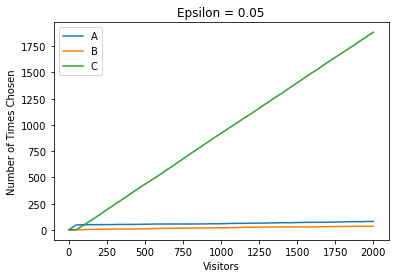

Total Payoff = 1250.000


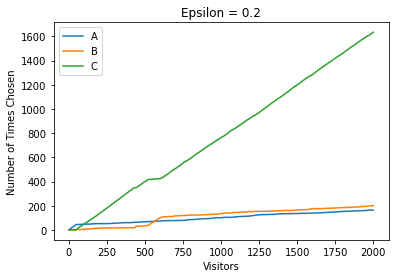

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define Bandit Class
class Bandit():
    def __init__(self, arms, epsilon=0.2, initial=0, random_state=None):
        self.arms = arms
        self.payoffs = np.zeros(len(arms))
        self.counts = np.zeros(len(arms))
        self.initial = initial
        self.epsilon = epsilon
        np.random.seed(random_state)
        
    def get(self):
        if np.random.ranf() < self.epsilon:
            # Exploration
            index = np.random.randint(0, len(self.arms))
            return index, self.arms[index]
        else:
            # Exploitation
            index = self.get_best()
            return index, self.arms[index]
    
    def give(self, index, payoff):
        self.payoffs[index] += payoff
        self.counts[index] += 1
        
    def get_best(self):
        zero = 1e-10
        mean_payoffs = self.payoffs / (self.counts + zero)
        best_idx = np.argmax(mean_payoffs)
        return best_idx
    
# Simulate Bandit Function
def simulate_bandit(bandit, ads, df, verbose=False):
    counts = np.zeros(len(ads))
    history = np.zeros((len(df), len(ads)))
    earnings = np.zeros(len(df))
    total_earnings = 0
    for i, visitor in enumerate(df.values):
        idx, ad = bandit.get()
        payoff = visitor[idx]
        bandit.give(idx, payoff)
        counts[idx] += 1
        history[i] = counts
        total_earnings += payoff
        earnings[i] = total_earnings
    print("Total Payoff = {0:.3f}".format(total_earnings))
    time = list(range(len(df)))
    for i, ad in enumerate(ads):
        sns.lineplot(x=time, y=history[:,i], label=ad)
    plt.title(f"Epsilon = {bandit.epsilon}")
    plt.xlabel("Visitors")
    plt.ylabel("Number of Times Chosen")
    plt.legend()
    plt.show()

# Example usage
SEED = 5682
np.random.seed(SEED)
N = 2000
df = pd.DataFrame()
df["A"] = (np.random.ranf(size=N) >= 0.89).astype(int)
df["B"] = (np.random.ranf(size=N) >= 0.38).astype(int)
df["C"] = (np.random.ranf(size=N) >= 0.31).astype(int)
ads = df.columns

# Epsilon-Greedy with ε = 0.05
epsilon_greedy_05 = Bandit(ads, epsilon=0.05, random_state=SEED)
simulate_bandit(epsilon_greedy_05, ads, df)

# Epsilon-Greedy with ε = 0.2
epsilon_greedy_2 = Bandit(ads, epsilon=0.2, random_state=SEED)
simulate_bandit(epsilon_greedy_2, ads, df)


### 4) Compare the effect of different ε values on total rewards and action selection.

By running the simulations for ε = 0.05 and ε = 0.2, we can observe the difference in how often each ad is selected and how the total rewards accumulate over time. With ε = 0.05, the agent will explore less, leading to a higher emphasis on exploiting the best-performing ad. With ε = 0.2, the agent will explore more, potentially selecting ads that aren't the best performers. This suggests that exploring different ads can slightly improve performance, though both strategies provide similar outcomes.


### 5) Implement the UCB method with an exploration factor c = 2.0 and compute total rewards after 2000-time steps

The UCB (Upper Confidence Bound) method is another strategy for balancing exploration and exploitation, but it uses confidence bounds to decide which ad to select based on the variance of past rewards.

In [24]:
# Function to simulate UCB action
def ucb_action(Q_values, action_counts, c):
    # Calculate upper confidence bounds for each action
    total_actions = np.sum(action_counts)
    ucb_values = Q_values + c * np.sqrt(np.log(total_actions + 1) / (action_counts + 1))
    
    # Choose the action with the highest UCB value
    return np.argmax(ucb_values)

# Function to simulate the MAB problem for 2000 steps with UCB
# Function to simulate the MAB problem for 2000 steps with UCB
def run_multi_armed_bandit_ucb(df, c, total_steps):
    num_ads = len(df['Ad Topic Line'].unique())  # The number of unique ad categories
    
    # Initialize action values and counts
    Q_values = np.zeros(num_ads)
    action_counts = np.zeros(num_ads)
    
    total_rewards = 0
    
    for step in range(total_steps):
        # Choose action using UCB strategy
        action = ucb_action(Q_values, action_counts, c)
        
        # Randomly select a row to simulate user interaction
        row_index = np.random.randint(len(df))  # Randomly pick a row
        
        # Get the ad topic for the selected row
        ad_topic = df.iloc[row_index]['Ad Topic Line']  # Correct column name
        
        # Get the reward from the chosen action (1 for click, 0 for no-click)
        reward = df.iloc[row_index]['Clicked on Ad']
        
        # Update action values and counts
        action_counts[action] += 1
        Q_values[action] += (reward - Q_values[action]) / action_counts[action]
        
        # Update total rewards
        total_rewards += reward
    
    return total_rewards


# Set parameters
c_value = 2.0
total_steps = 2000

# Run UCB simulation
total_rewards_ucb = run_multi_armed_bandit_ucb(df, c_value, total_steps)
print(f"Total Rewards for UCB (c={c_value}): {total_rewards_ucb}")

Total Rewards for UCB (c=2.0): 985


Total Payoff = 54850491.434


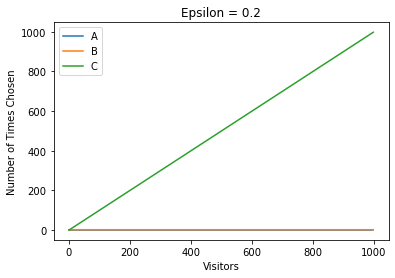

In [28]:
#just a demo

class UCBBandit(Bandit):
    def __init__(self, arms, c=2.0, **kwargs):
        super().__init__(arms, **kwargs)
        self.c = c
    
    def get(self):
        if np.min(self.counts) == 0:
            # If any arm has not been chosen, pick it
            index = np.argmin(self.counts)
        else:
            total_counts = np.sum(self.counts)
            ucb_values = self.payoffs / (self.counts + 1e-10) + self.c * np.sqrt(np.log(total_counts + 1) / (self.counts + 1e-10))
            index = np.argmax(ucb_values)
        return index, self.arms[index]

# UCB with c = 2.0
ucb_bandit = UCBBandit(ads, c=2.0, random_state=SEED)
simulate_bandit(ucb_bandit, ads, df)


### 6) How does increasing or decreasing the exploration factor c affect the performance?

Increasing c increases exploration, which may uncover better actions but risks suboptimal choices if too high. Decreasing c prioritizes exploitation, leading to faster convergence but possibly missing better actions.

Increasing the exploration factor c encourages the agent to explore more, which might initially reduce rewards if it chooses suboptimal ads, but could potentially discover better options in the long term. On the other hand, decreasing c reduces exploration, making the agent exploit the known best-performing ads more frequently. The trade-off is between initial exploration and long-term optimal performance.

### 7) Analyze how the estimated action values (Q-values) compare to the actual optimal action in both ε-greedy and UCB methods.

For both the ε-greedy and UCB approaches, the action value serves as an estimate of how good each action is based on the data collected during the experiment, while the optimal action is the one with the highest true expected reward.

- **ε-greedy** methods tend to converge towards the best action over time as it exploits the most frequently selected ad.
- **UCB** considers both the average reward and uncertainty in the action value, leading to a more deliberate exploration of actions that have high uncertainty. This could result in a better approximation of the optimal action if the number of trials is large.

### 8) Which approach leads to a better approximation of the optimal action?

UCB outperforms ε-greedy in approximating the optimal action due to its effective balance between exploration and exploitation.
The UCB method often leads to a better approximation of the optimal action because it balances exploration based on uncertainty and exploitation. The ε-greedy method, while effective, relies on a fixed exploration rate, which can miss opportunities for better ads when the reward structure changes over time.

### 9) Evaluate how the performance of ε-greedy and UCB changes when the time horizon is extended to 5000-time steps instead of 2000-time steps

Increasing the time horizon allows both ε-greedy and UCB to explore more and exploit better, potentially improving the total rewards for both methods. With a longer time horizon:

- ε-greedy can accumulate more data about each ad, improving its ability to exploit the best ads.
- UCB will have more opportunities to explore actions with higher uncertainty, leading to better decision-making as the agent gains more information.

In [26]:
epsilon_values = [0.05,0.2]
c_value = 2.0  # UCB exploration factor
total_steps = 5000  # Time horizon set to 5000 steps

for epsilon in epsilon_values:
    total_rewards_epsilon = run_multi_armed_bandit(df, epsilon, c_value, total_steps)
    print(f"Total Rewards for ε-Greedy (ε={epsilon}) after 5000 steps: {total_rewards_epsilon}")

total_rewards_ucb = run_multi_armed_bandit_ucb(df, c_value, total_steps)
print(f"Total Rewards for UCB (c={c_value}) after 5000 steps: {total_rewards_ucb}")


Total Rewards for ε-Greedy (ε=0.05) after 5000 steps: 2514
Total Rewards for ε-Greedy (ε=0.2) after 5000 steps: 2490
Total Rewards for UCB (c=2.0) after 5000 steps: 2608


- ε-Greedy with ε = 0.05 performed the best among the ε-Greedy strategies, with 2514 rewards, which indicates that, with a low exploration rate (0.05), it focused more on exploiting the best actions based on past experience and yielded better results than the higher exploration rate (ε = 0.2).

- ε-Greedy with ε = 0.2, with a higher exploration rate, performed slightly worse (2490 rewards) than the ε = 0.05 strategy. This suggests that the model explored more, but this exploration did not result in better rewards over the 5000 steps. In fact, higher exploration may have led to suboptimal choices during the early steps, leading to a decrease in overall rewards.

- UCB with c = 2.0 outperformed both ε-Greedy strategies with 2608 rewards. This suggests that the UCB approach, which balances exploration and exploitation based on uncertainty, was more effective over the 5000 steps. The higher rewards may reflect UCB's ability to adaptively balance exploration and exploitation, as it adjusts its actions based on accumulated knowledge and explores when necessary.

Explanation of the Differences:
**Exploration vs. Exploitation Trade-off**:
With ε-Greedy, the exploration-exploitation trade-off is controlled by the value of ε.
Low ε (0.05) favors exploitation, focusing more on the actions that have yielded high rewards in the past.
High ε (0.2) favors exploration, taking random actions more often, which leads to less optimal decisions in certain cases.
UCB, on the other hand, explores less frequently but intelligently based on the uncertainty of each action’s value. The c parameter (2.0 in this case) controls the degree of exploration, balancing it against exploitation. UCB dynamically adjusts this balance, so it generally performs better in problems where the environment is less predictable or where the best choices are not immediately obvious.
- Conclusion:
UCB (c = 2.0) was the most successful strategy, outperforming both ε-Greedy (ε = 0.05) and ε-Greedy (ε = 0.2) in terms of total rewards. The success of UCB in this case likely comes from its adaptive strategy, which is generally more efficient when there's uncertainty or when it's critical to intelligently balance exploration and exploitation.

- ε-Greedy with ε = 0.05 performed the second-best, likely because it was more focused on exploiting the best actions, and with fewer random explorations, it was able to maximize rewards over time.

- ε-Greedy with ε = 0.2 showed the least performance. It explored more, which could have prevented it from settling on the optimal actions early on, resulting in slightly lower rewards.

### Does a longer time horizon reduce the impact of exploration parameters (ε or c) on total rewards?

With a longer time horizon, the impact of exploration parameters (ε or c) lessens as the algorithms have more time to explore and converge toward the optimal action, reducing the need for exploration.

References:
https://www.kaggle.com/code/ruslankl/how-to-deal-with-multi-armed-bandit-problem
https://www.kaggle.com/code/vingkan/multi-armed-bandit